# STA 141B Lecture 6

The class website is <https://github.com/2019-winter-ucdavis-sta141b/notes>

### Announcements

* Project groups and a link to the project repository will be posted this evening

### Topics

* Pandas
* Static Visualizations
    + matplotlib
    + plotnine
    + seaborn

### Data Sets

* [Milk Sales Dataset](https://www.ers.usda.gov/webdocs/DataFiles/48685/fluidmilk.xlsx?v=5010.6)
* Dogs Dataset (included in the class repo)


### References

* Python for Data Analysis, Ch. 8, 9
* [Python Data Science Handbook][PDSH], Ch. 3, 4

[PDSH]: https://jakevdp.github.io/PythonDataScienceHandbook/
[ProGit]: https://git-scm.com/book/

## More About Packages and Modules

Which of the built-in modules are important?

Module      | Description
----------- | -----------
sys         | info about Python (version, etc)
pdb         | Python debugger
pathlib     | tools for file paths
collections | additional data structures
string      | string processing
re          | regular expressions
datetime    | date processing
urlparse    | tools for URLs
itertools   | tools for iterators
functools   | tools for functions

Python's built-in `math` and `statistics` modules are missing features we need for serious scientific computing, so we use the "SciPy Stack" instead, which includes `numpy`, `scipy`, and `pandas`.

## Tidying a Dataset

Do Americans prefer low fat milk over whole milk?

The USDA publishes data about dairy production. We can answer the question with the [Milk Sales Dataset](https://www.ers.usda.gov/webdocs/DataFiles/48685/fluidmilk.xlsx?v=5010.6).

Many of Python's visualization packages expect [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf), which means:

1. Each feature must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

Let's tidy up the Milk Sales Dataset so we can make a line plot that shows how milk sales have changed over time.

In [1]:
import numpy as np
import pandas as pd

In [37]:
milk = pd.read_excel("../../data/fluidmilk.xlsx", skiprows = 1)

# quantities in millions of pounds

# Rename first column and fix last column name
# Also see .rename({"Whole": "Whole Milk"})
milk.columns.values[0] = "Year"

milk.columns.values[-1] = milk.columns.values[-1].strip("1")

# Slice to get rid of extra rows at the end
milk = milk[:-3]

# Check data types
milk.dtypes

# Move columns in tidy format into the index
milk = milk.set_index("Year")

milk = milk.stack()

# You can use .reset_index() to get a regular data frame
milk = milk.reset_index()
milk.columns.values[[1, 2]] = ["Kind", "Sales"]

# MultiIndexes are convenient for subsetting the data
milk.head()

,Year,Kind,Sales
0,1975,Whole,36188.0
1,1975,Reduced-fat (2 % milk fat),8726.0
2,1975,Low-fat \n(1 % milk fat),2742.0
3,1975,Skim,2480.0
4,1975,Flavored whole,1366.0


## Visualization in Python

![Python visualization landscape](img/visualization_landscape.png)
_Image from [Jake VanderPlas](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017). See [here](https://rougier.github.io/python-visualization-landscape/landscape-colors.html) for a version with links to all of the packages!_

Our focus right now is _static_ visualization, where the visualization is a still image. So what packages should you actually use?

* __plotnine__ is convenient if you already know ggplot2. It's relatively new, so there are some bugs and missing features.

* __seaborn__ is designed specifically for making statistical plots. It's well-documented and stable. Most of the package's functions expect tidy data as input.

* __matplotlib__ is useful to know, since many other packages use matplotlib under the hood. That said, using matplotlib alone to create plots is painful; matplotlib is _low-level_, so it's flexible but simple plots may take [5 lines of code or more][ex]. The matplotlib PyPlot tools may be convenient if you already know MATLAB.

* __pandas__ provides built-in plotting functions, which can be convenient but are more limited than the packages above. They're also inconsistent about the expected format of the data.

We don't have time to exhaustively cover visualization packages for Python. You're welcome to explore other packages while doing the assignments for this class.

Later in the quarter, we'll see some of Python's _interactive_ visualization packages.

[ex]: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

## Jupyter and matplotlib

Jupyter notebooks can display most static visualizations and some interactive visualizations. If you're going to use visualization packages that depend on matplotlib, it's a good idea to set up your notebook by running:

In [50]:
# Initialize matplotlib

%matplotlib inline

import matplotlib.pyplot as plt

# We'll see what this code does later on:
plt.rcParams["figure.figsize"] = [10, 8]

## Plotting the Milk Dataset with plotnine

See the [plotnine documentation](https://plotnine.readthedocs.io/en/latest/)! Also see the [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/) and the [ggplot2 cheatsheet](https://github.com/rstudio/cheatsheets/raw/master/data-visualization-2.1.pdf). If you run into a bug, you may want to check for a work-around on the [plotnine bug tracker](https://github.com/has2k1/plotnine/issues).

We can avoid typing `plotnine.` over and over again by importing all of plotnine's objects directly into the global namespace:

In [40]:
from plotnine import *

Importing other packages this way is not recommended, since names of objects in a package may overlap with names of objects you've defined.


The syntax of plotnine closely follows the syntax of R's ggplot2. In R, we would write

```r
ggplot2(milk, aes(x = Year, y = Sales, color = Kind)) + geom_line() 
```

One important difference is that plotnine requires that we quote variable names.

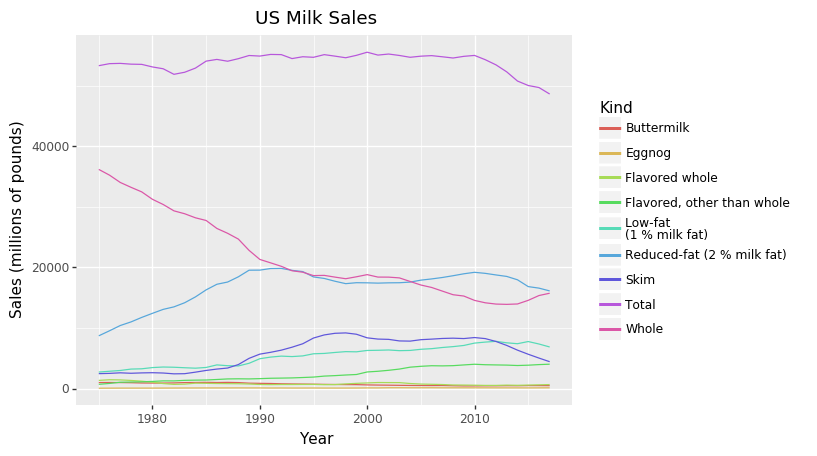

<ggplot: (8792240867441)>

In [46]:
(
    ggplot(milk, aes(x = "Year", y = "Sales", color = "Kind")) + geom_line()
    + labs(title = "US Milk Sales", y = "Sales (millions of pounds)")
)

plotnine includes the familiar `ggsave()` function for saving a visualization to an image file.

## Plotting the Milk Dataset with seaborn

See the [seaborn documentation](https://seaborn.pydata.org/)!

In [54]:
import seaborn as sns

sns.__version__

'0.9.0'

Text(0.5, 1.0, 'US Milk Sales')

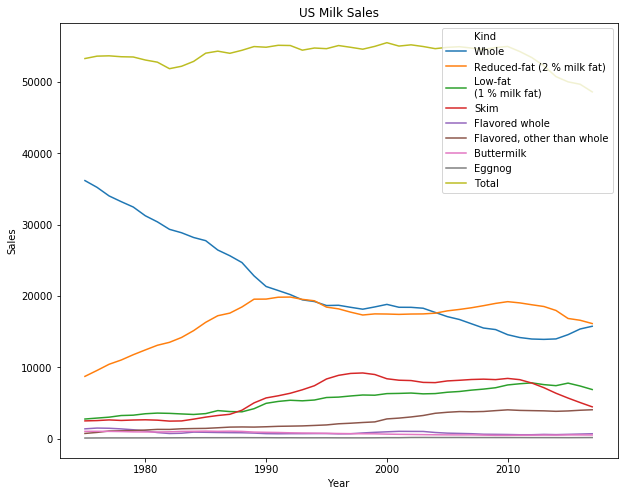

In [53]:
ax = sns.lineplot("Year", "Sales", hue = "Kind", data = milk)
ax.set_title("US Milk Sales")

If we want to adjust the size and layout, we have to learn more about matplotlib.

## The Basics of matplotlib

See the [matplotlib documentation](https://matplotlib.org/contents.html)!

First, let's change the size of the figures in the notebook. To do that, we need to go back to the code we used to initialize matplotlib, and adjust `rcParams`, matplotlib's default settings.

### Jargon

The most important thing to know is matplotlib's jargon:

* _Figure_: Container for plots.
* _Axes_: Container for components of a plot ("primitives"). In other words, an axes is a single plot.
* _Axis_: Container for components of an axis. An axis is a single axis.
* _Tick_: A container for tick marks on an axis.

All of the containers and the primitives are called _Artists_.

### Saving Figures

You can save figures to an image file with the `.savefig()` method.

Some plotting functions return an Axes instead of a Figure. You can get the Figure that contains an Axes with the `.get_figure()` method. So to save our seaborn plot:

## Comparing Packages

Let's use the familiar dogs dataset to further compare the different plotting packages.

In [ ]:
dogs = pd.read_csv("../../data/dogs_full.csv")

### Dot Plots

Plot the number of dogs in each category.

In [ ]:
# Plotnine

p = ggplot(dogs, aes(x = "group")) + geom_point(stat = "count")
p + labs(title = "Dog Groups", x = "Group", y = "Count")

In [ ]:
# Seaborn
counts = dogs["group"].value_counts()
# Pandas calls the rownames an "index"

ax = sns.stripplot(x = counts.index, y = counts)
ax.set(title = "Dog Groups", xlabel = "Group", ylabel = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [ ]:
# Pandas
counts = dogs["group"].value_counts()

ax = counts.plot(style = "o")
ax.set(title = "Dog Groups", xlabel = "Group", ylabel = "Count")

### Box Plots

Plot the distribution of dog longevity, grouped by category.

In [ ]:
# Plotnine

p = ggplot(dogs, aes("group", "longevity")) + geom_boxplot()
p + labs(title = "Dog Longevity", x = "Group", y = "Years")

In [ ]:
# Seaborn

ax = sns.boxplot(x = "group", y = "longevity", data = dogs)
ax.set(title = "Dog Longevity", xlabel = "Group", ylabel = "Years")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [ ]:
# Pandas

ax = dogs.boxplot(by = "group", column = "longevity", rot = 45)
# Set title and axis labels.
ax.set(title = "Dog Longevity", xlabel = "Group", ylabel = "Years")
# Hide grouping title Pandas adds.
ax.get_figure().suptitle("")

### Scatter Plots

Plot popularity against datadog score.

In [ ]:
# Plotnine

p = ggplot(dogs, aes("datadog", "popularity")) + geom_point()
p + labs(title = "Best in Show", x = "DataDog Score", y = "Popularity Rank")
# A bug in the latest version of plotnine prevents this line from working:
# p + ylim(95, -5)

In [ ]:
# Seaborn

ax = sns.regplot(x = "datadog", y = "popularity", data = dogs, fit_reg = False)
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ylim = reversed(ax.get_ylim())
ax.set_ylim(ylim)

In [ ]:
# Pandas

ax = dogs.plot.scatter(x = "datadog", y = "popularity")
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ylim = reversed(ax.get_ylim())
ax.set_ylim(ylim)